In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import torch
import utils
from models import DIP

In [27]:
clean = utils.load_images('./data/celeba10/')
noisy = torch.stack([utils.get_noisy_image(img, 0.05) for img in clean])

In [28]:
input_channels = 32
deep_channels = [8, 16, 32, 64, 128]
skip_channels = [0, 0, 0, 4, 4]

dip = DIP(input_channels, deep_channels, skip_channels, epochs=2400)

denoised = []
for i in range(len(noisy)):
  denoised.append(dip.denoise(noisy[[i]], id=i, verbose=False))
denoised = torch.cat(denoised)

0: Training on cuda:0
----------
Finished training in 00:01:16

1: Training on cuda:0
----------
Finished training in 00:01:15

2: Training on cuda:0
----------
Finished training in 00:01:16

3: Training on cuda:0
----------
Finished training in 00:01:16

4: Training on cuda:0
----------
Finished training in 00:01:16

5: Training on cuda:0
----------
Finished training in 00:01:15

6: Training on cuda:0
----------
Finished training in 00:01:15

7: Training on cuda:0
----------
Finished training in 00:01:16

8: Training on cuda:0
----------
Finished training in 00:01:16

9: Training on cuda:0
----------
Finished training in 00:01:16



In [29]:
denoised = denoised.detach().cpu()
noisy = noisy.cpu()

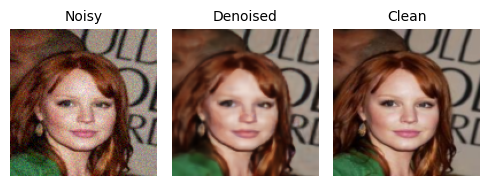

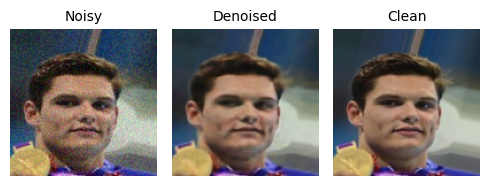

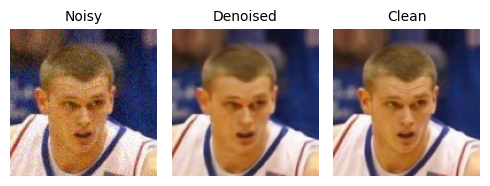

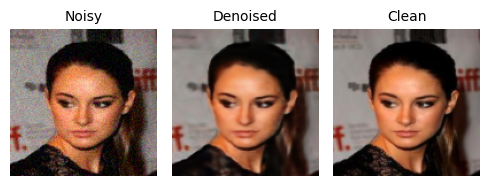

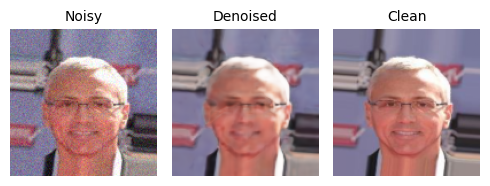

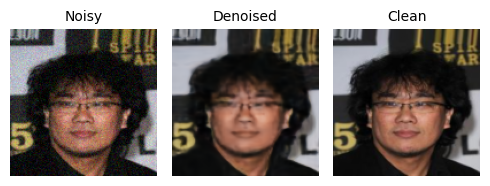

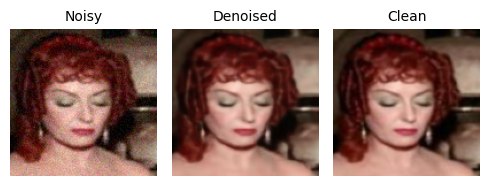

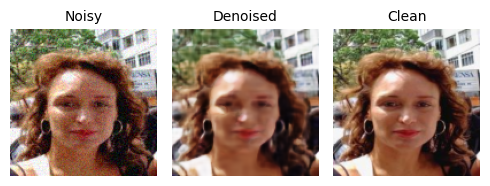

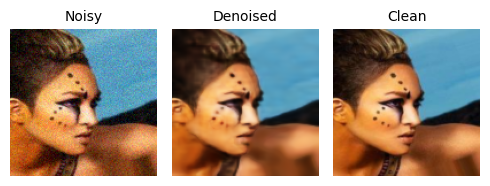

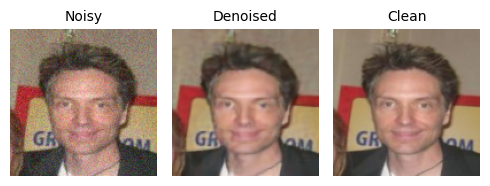

In [30]:
for n, d, c in zip(noisy, denoised, clean):
  utils.plot_row([n, d, c], ['Noisy', 'Denoised', 'Clean'])

In [31]:
from torchmetrics.image import PeakSignalNoiseRatio, StructuralSimilarityIndexMeasure

psnr = PeakSignalNoiseRatio(reduction=None, data_range=1, dim=[1, 2, 3])
noisy_psnr = psnr(noisy, clean)
denoised_psnr = psnr(denoised, clean)

print('PSNR:')
print('----------')
print('Mean:')
print(f'Noisy:\t\t{noisy_psnr.mean()}')
print(f'Denoised:\t{denoised_psnr.mean()}')
print('\nElement-wise:')
print(f'Noisy:\t\t{noisy_psnr.tolist()}')
print(f'Denoised:\t{denoised_psnr.tolist()}')

PSNR:
----------
Mean:
Noisy:		26.23077392578125
Denoised:	32.46504211425781

Element-wise:
Noisy:		[26.186511993408203, 26.07746696472168, 26.13055419921875, 26.460861206054688, 26.111345291137695, 26.436166763305664, 26.378517150878906, 26.290456771850586, 26.212793350219727, 26.023038864135742]
Denoised:	[31.616802215576172, 32.35113525390625, 33.609214782714844, 32.3955078125, 33.503623962402344, 32.31942367553711, 34.67170715332031, 28.031702041625977, 32.39427947998047, 33.756980895996094]


In [32]:
ssim = StructuralSimilarityIndexMeasure(reduction=None, data_range=1)
noisy_ssim = ssim(noisy, clean)
denoised_ssim = ssim(denoised, clean)

print('SSIM:')
print('----------')
print('Mean:')
print(f'Noisy:\t\t{noisy_ssim.mean()}')
print(f'Denoised:\t{denoised_ssim.mean()}')
print('\nElement-wise:')
print(f'Noisy:\t\t{noisy_ssim.tolist()}')
print(f'Denoised:\t{denoised_ssim.tolist()}')

SSIM:
----------
Mean:
Noisy:		0.631405234336853
Denoised:	0.9180059432983398

Element-wise:
Noisy:		[0.7076913714408875, 0.5820384621620178, 0.5921185612678528, 0.625716507434845, 0.5765722393989563, 0.6627512574195862, 0.6381901502609253, 0.7831184267997742, 0.5875417590141296, 0.5583141446113586]
Denoised:	[0.9185002446174622, 0.9239540100097656, 0.9278169274330139, 0.8875508308410645, 0.9337576031684875, 0.9251076579093933, 0.9338107109069824, 0.8907451033592224, 0.911928117275238, 0.9268876910209656]
